## Data Science Assignment UnSupervised Learning  

## Assignment Name : Crimes in Boston                                          Date : 20th Jan 2022

## Professor Name : Christa Santos                                             

## Student Name : 0921_UnsupML_{Nazmul Farooquee}



Boston, officially the City of Boston, is the capital and most populous city of Massachusetts in the United States and the 24th most populous city. The city proper covered 48.5 square miles with 675,674 in 2020. 

A global city, Boston is placed among the top 30 most economically powerful cities globally. Encompassing $363 billion, the Greater Boston metropolitan area has the sixth-largest economy in the country and 12th largest in the world. 

Boston included $414 million in spending on the Boston Police Department in the fiscal 2021 budget. This is the second-largest allocation of funding by the city after the grant to Boston Public Schools. 

## Target: 

Boston Crimes Data analysis: Crime incident reports are provided by Boston Police Department. Our primary focus is to regularly identify and predict the crimes based on the nature of crimes and occurrences. Which type of crime happened most frequently, and which district was affected most. 



Import Libraries and Datasets 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , normalize 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 

In [2]:
crime_df = pd.read_csv('crime.csv', encoding='windows-1252', delimiter=',')

In [3]:
crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
crime_df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [6]:
crime_df['OCCURRED_ON_DATE'] = pd.to_datetime(crime_df['OCCURRED_ON_DATE'])
crime_df['Lat'] = pd.to_numeric(crime_df['Lat'])
crime_df['Long'] = pd.to_numeric(crime_df['Long'])
print("start date:", crime_df['OCCURRED_ON_DATE'].min())
print("end date:", crime_df['OCCURRED_ON_DATE'].max())

start date: 2015-06-15 00:00:00
end date: 2018-09-03 21:25:00


In [7]:
crime_df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
crime_df['YEAR'].unique()

array([2018, 2017, 2016, 2015])

In [9]:
np.isnan(crime_df.any())

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT               False
REPORTING_AREA         False
SHOOTING               False
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART               False
STREET                 False
Lat                    False
Long                   False
Location               False
dtype: bool

In [10]:
crime_df['DISTRICT'].unique()

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

Top 5 offense code group 

In [11]:
offense = pd.pivot_table(crime_df.loc[:,['OFFENSE_CODE_GROUP', 'YEAR', 'OFFENSE_CODE']], index='OFFENSE_CODE_GROUP', \
                columns='YEAR', aggfunc=np.count_nonzero)

In [12]:
summary = pd.DataFrame(offense.apply(np.sum, axis=1))
summary = summary.rename(columns={0:'total'})

In [13]:
sumsort = summary.sort_values(by='total', ascending=False)
top5 = sumsort.iloc[0:5,:]
top5 

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,37132.0
Larceny,25935.0
Medical Assistance,23540.0
Investigate Person,18750.0
Other,18075.0


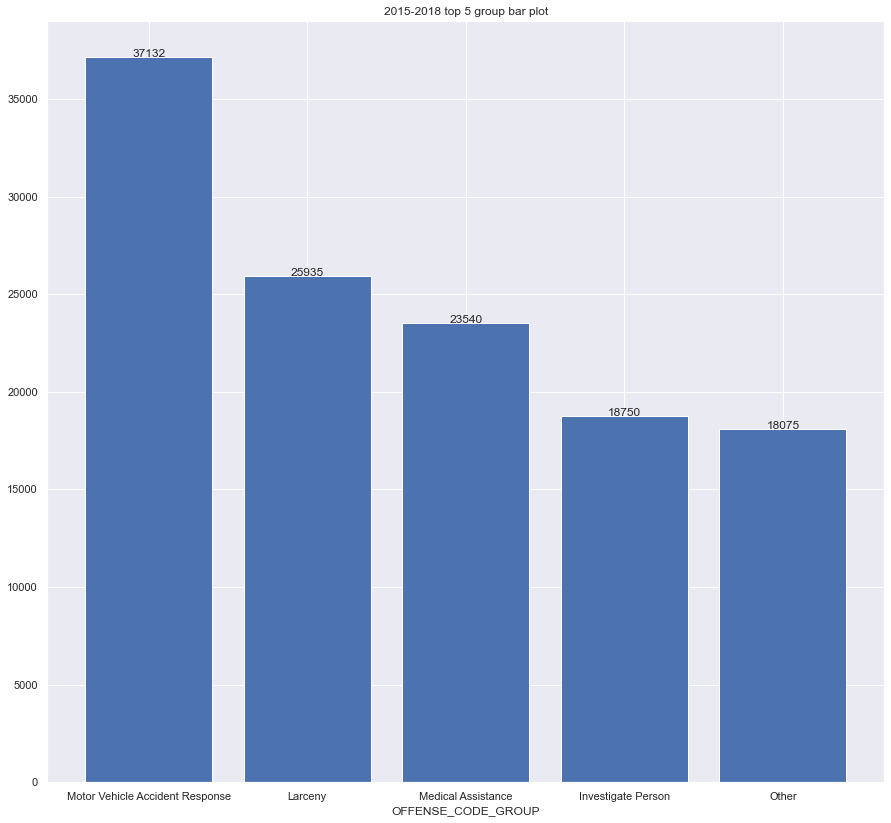

In [14]:
sns.set()
p0 = plt.figure(figsize=(15,14))
plt.title(r'2015-2018 top 5 group bar plot')
plt.bar(range(top5.index.shape[0]), top5.loc[:, 'total'])
plt.xlabel('OFFENSE_CODE_GROUP')
plt.xticks(range(top5.index.shape[0]), top5.index)
x = np.arange(top5.index.shape[0])
y = np.array(top5['total'])
for i,j in zip(x,y):
    plt.text(i,j, '%d'%j, ha='center')
p0.savefig('./top5_group_bar.png')
plt.show()

## Visualization by DISTRICT 

In [15]:
disgroup = crime_df.groupby(by='DISTRICT')

In [16]:
groupcount = disgroup.count()

In [17]:
groupcount.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
DISTRICT,,,,,,,,,,,,,,,,
A1,35717,35717,35717,35717,35717,11,35717,35717,35717,35717,35717,35715,34179,32301,32301,35717
A15,6505,6505,6505,6505,6505,5,6505,6505,6505,6505,6505,6505,6330,6170,6170,6505
A7,13544,13544,13544,13544,13544,14,13544,13544,13544,13544,13544,13541,13244,13024,13024,13544
B2,49945,49945,49945,49945,49945,344,49945,49945,49945,49945,49945,49929,48132,46207,46207,49945
B3,35442,35442,35442,35442,35442,221,35442,35442,35442,35442,35442,35429,34687,33701,33701,35442


In [18]:
number = groupcount.iloc[:,0]
number = pd.DataFrame(number)

In [19]:
number.rename(columns={'INCIDENT_NUMBER':'NUMBER'}, inplace=True)
number.head()

,NUMBER
DISTRICT,
A1,35717
A15,6505
A7,13544
B2,49945
B3,35442


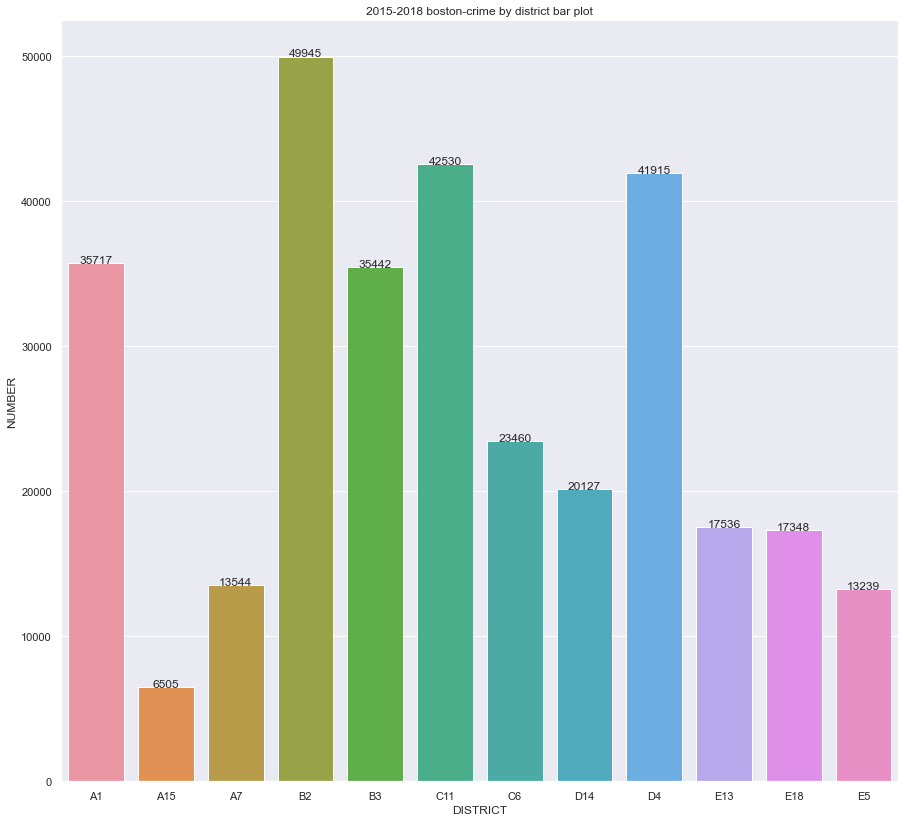

In [20]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 boston-crime by district bar plot')
p1 = sns.barplot(x=number.index, y='NUMBER', data=number)
x = np.arange(number.index.shape[0])
y = np.array(list(number['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05, '%d'%j, ha='center')
else:
    pass
p1fig = p1.get_figure()
p1fig.savefig('./total_by_district_bar.png')
plt.show()

District B2 has the highest number of crimes. C11 and D4 are more elevated than other districts. A15 is the least. 

In [21]:
districtsorted = number.sort_values(by ='NUMBER', ascending=False)

In [22]:
top5 = districtsorted.iloc[0:5,:]

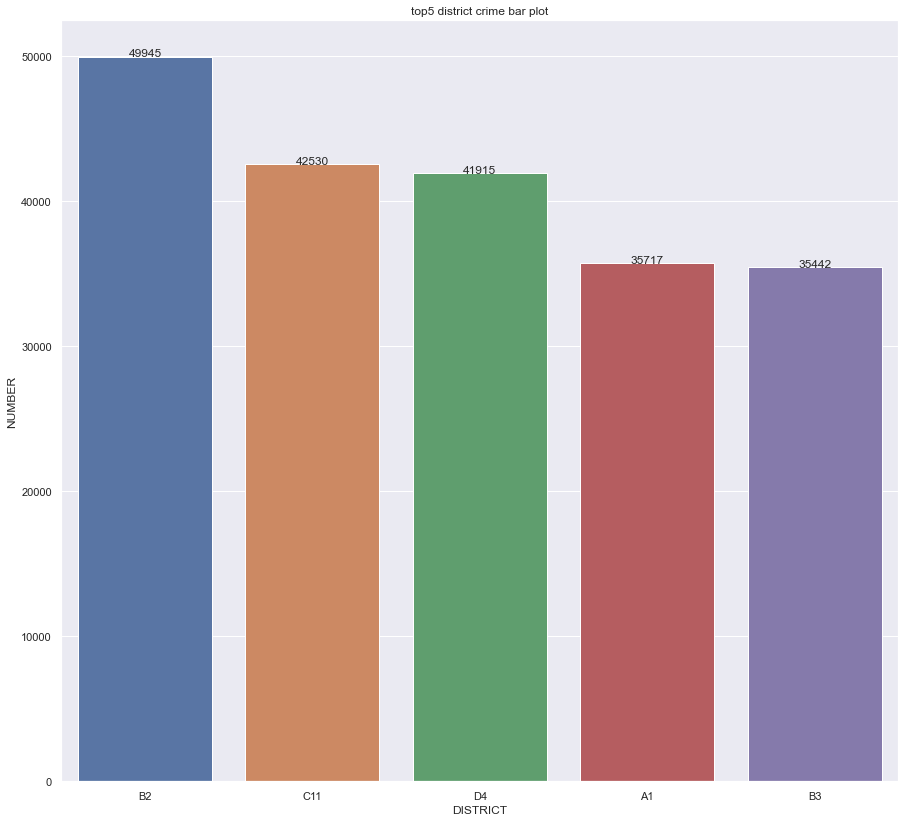

In [23]:
plt.figure(figsize=(15,14))
plt.title(r'top5 district crime bar plot')
p2 = sns.barplot(x=top5.index, y='NUMBER',data=top5)
x = np.arange(top5.index.shape[0])
y = np.array(list(top5['NUMBER']))
for i,j in zip(x,y):
    plt.text(i,j+0.05,'%d'%j, ha='center')
else:
    pass
p2fig = p2.get_figure()
p2fig.savefig('./top5_district_crime_bar.png')
plt.show()

## Visualization by YEAR 

In [24]:
yeargroup = crime_df.groupby(by='YEAR')

In [25]:
count = yeargroup.count()

In [26]:
yearnumber = pd.DataFrame(count.iloc[:,0])

In [27]:
yearnumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'}, inplace=True)

In [28]:
yearnumber

,NUMBER
YEAR,
2015,53388
2016,99114
2017,100886
2018,65685


The maximum number of crimes happened in 2017. 

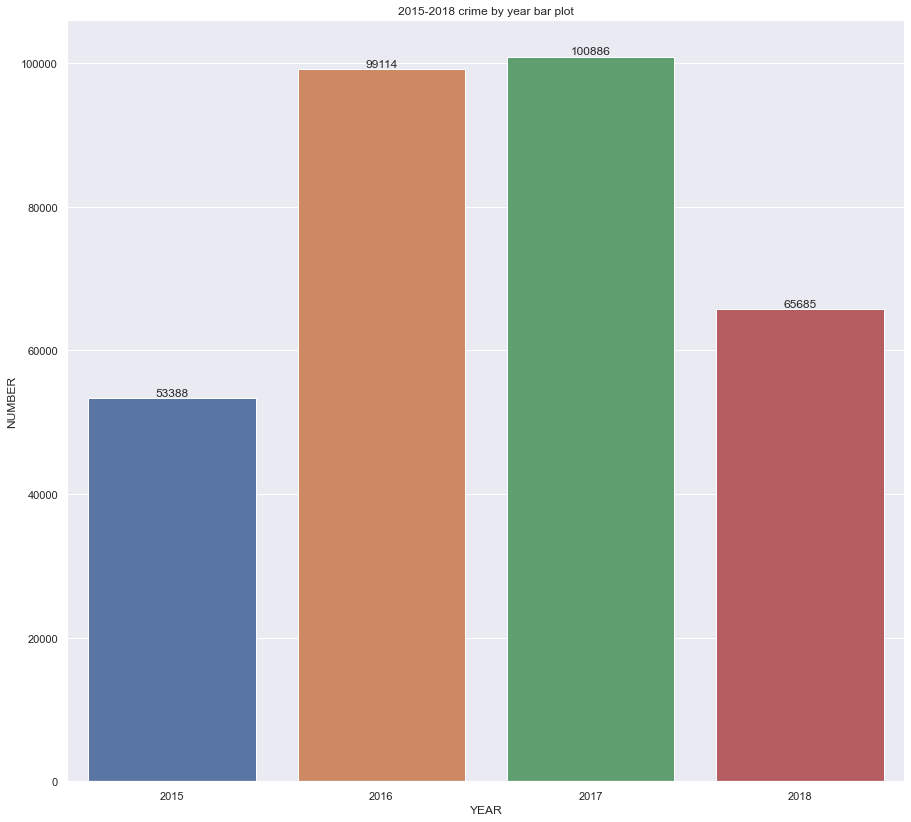

In [29]:
plt.figure(figsize=(15,14))
plt.title(r'2015-2018 crime by year bar plot')
p3 = sns.barplot(x=yearnumber.index, y='NUMBER', data=yearnumber)
x = np.arange(yearnumber.index.shape[0])
y = np.array(list(yearnumber['NUMBER']))
for i, j in zip(x,y):
    plt.text(i,j,'%d'%j, ha='center', va='bottom')
else:
    pass
p3fig = p3.get_figure()
p3fig.savefig('./total_by_year_bar.png')
plt.show()

The maximum number of crimes in 2017 and 2015 is the lowest; this may be caused by people getting more depressive by year.

## Shooting crime summary and Visualization 

In [30]:
crime_df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [31]:
crime_df.shape 

(319073, 17)

In [32]:
crime_df['SHOOTING']=crime_df['SHOOTING'].fillna('N')

In [33]:
crime_df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [34]:
crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [35]:
shootcrime = pd.pivot_table(crime_df.loc[crime_df['SHOOTING']=='Y',['YEAR', 'DISTRICT', 'SHOOTING']],\
    index='YEAR',columns='DISTRICT', aggfunc=np.count_nonzero)

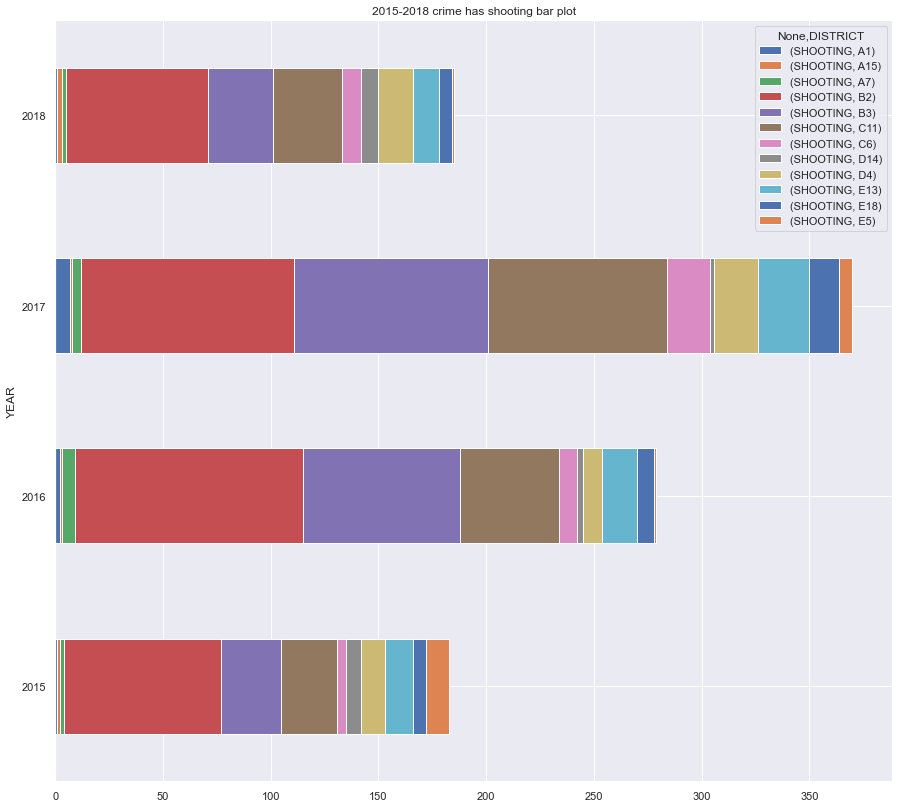

In [36]:
sns.set()
p4 = shootcrime.plot(title=r'2015-2018 crime has shooting bar plot', figsize=(15,14), kind='barh', stacked=True)

p4fig = p4.get_figure()
p4fig.savefig('./total_shooting_crime_barh.png')
plt.show()

In [37]:
districtSum = shootcrime.apply(np.sum)
districtSum = pd.DataFrame(districtSum)

In [38]:
districtSum = districtSum.rename(columns={0:r'shooting total'})

In [39]:
districtSum = districtSum.sort_values(by=r'shooting total', ascending=False)

In [40]:
top5 = districtSum.iloc[0:5,:]
top5

shooting total
         DISTRICT                
SHOOTING B2                   344
         B3                   221
         C11                  187
         E13                   65
         D4                    56

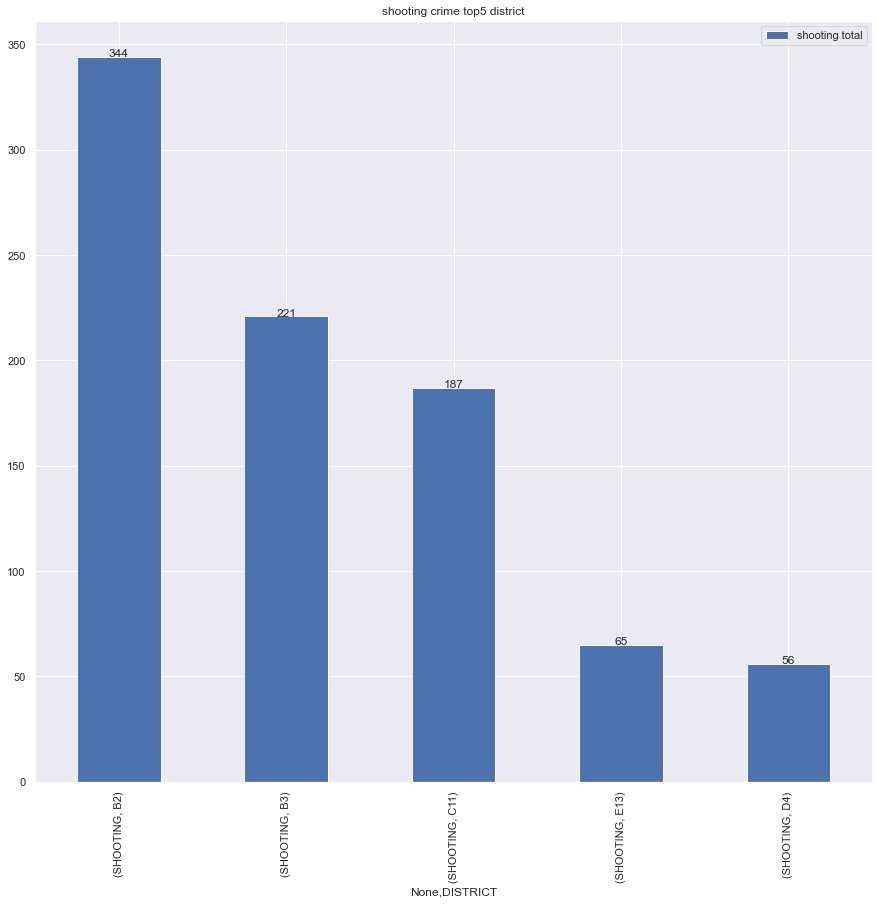

In [41]:
sns.set()
p5 = top5.plot(title=r'shooting crime top5 district', figsize=(15,14), kind='bar')
x = np.arange(top5.index.shape[0])
y = np.array(list(top5[r'shooting total']))
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j, ha='center')
p5fig = p5.get_figure()
p5fig.savefig('./shooting_crime_top5_bar.png')
plt.show()

This chart clearly shows how these shooting crimes occur and which district is affected most. B2 and B3 are top of the list. 

## Visualization by Month

In [42]:
byMonth = crime_df.groupby(by='MONTH')

In [43]:
Monthcount=byMonth.count()

In [44]:
MonthNumber = pd.DataFrame(Monthcount.iloc[:,0])
MonthNumber.head()

,INCIDENT_NUMBER
MONTH,
1,23610
2,21653
3,24146
4,24086
5,26199


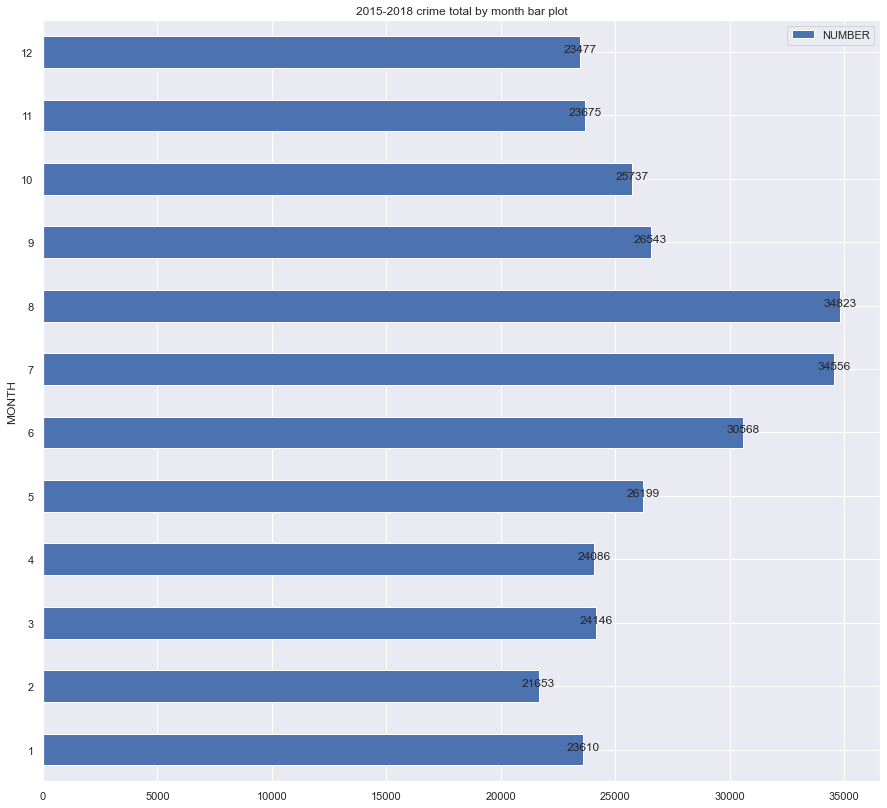

In [45]:
MonthNumber = MonthNumber.rename(columns={'INCIDENT_NUMBER':'NUMBER'})
sns.set()
p6 = MonthNumber.plot(title=r'2015-2018 crime total by month bar plot', figsize=(15,14), kind='barh')
x = np.arange(MonthNumber.index.shape[0])
y = np.array(list(MonthNumber['NUMBER']))
for i,j in zip(x,y):
    plt.text(j,i,'%d'%j, ha='center')
p6fig = p6.get_figure()
p6fig.savefig('./total_by_month_bar.png')
plt.show()

In Boston, the warmest months are July and August, wherein the temperature is relatively high compared to Dec to Feb. It could be a reason for the criminal to move around quickly and commit crimes.  

In [46]:
Month = pd.pivot_table(crime_df.loc[:,['YEAR','MONTH','INCIDENT_NUMBER']],\
                    index='YEAR',columns='MONTH', aggfunc=np.count_nonzero)
Month

INCIDENT_NUMBER                                                          \
MONTH              1       2       3       4       5       6       7       8    
YEAR                                                                            
2015              NaN     NaN     NaN     NaN     NaN  4191.0  8324.0  8342.0   
2016           7835.0  7308.0  8199.0  8101.0  8578.0  8558.0  8619.0  8938.0   
2017           7993.0  7408.0  8179.0  8069.0  8715.0  8985.0  9075.0  9206.0   
2018           7782.0  6937.0  7768.0  7916.0  8906.0  8834.0  8538.0  8337.0   

                                       
MONTH      9       10      11      12  
YEAR                                   
2015   8414.0  8308.0  7818.0  7991.0  
2016   8522.0  8583.0  7922.0  7951.0  
2017   8940.0  8846.0  7935.0  7535.0  
2018    667.0     NaN     NaN     NaN

In [47]:
Month = Month.fillna(0)

In [48]:
Month

INCIDENT_NUMBER                                                          \
MONTH              1       2       3       4       5       6       7       8    
YEAR                                                                            
2015              0.0     0.0     0.0     0.0     0.0  4191.0  8324.0  8342.0   
2016           7835.0  7308.0  8199.0  8101.0  8578.0  8558.0  8619.0  8938.0   
2017           7993.0  7408.0  8179.0  8069.0  8715.0  8985.0  9075.0  9206.0   
2018           7782.0  6937.0  7768.0  7916.0  8906.0  8834.0  8538.0  8337.0   

                                       
MONTH      9       10      11      12  
YEAR                                   
2015   8414.0  8308.0  7818.0  7991.0  
2016   8522.0  8583.0  7922.0  7951.0  
2017   8940.0  8846.0  7935.0  7535.0  
2018    667.0     0.0     0.0     0.0

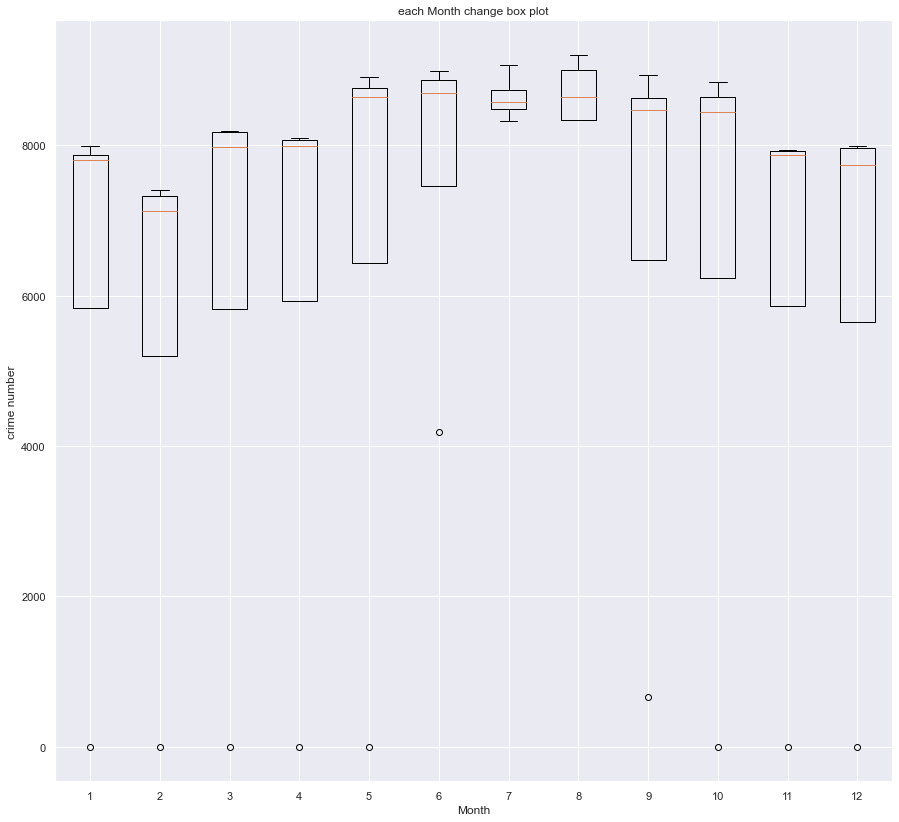

In [49]:
Monthlist = (list(Month.iloc[:,0])),(list(Month.iloc[:,1])),(list(Month.iloc[:,2])),\
    (list(Month.iloc[:,3])),(list(Month.iloc[:,4])),(list(Month.iloc[:,5])),(list(Month.iloc[:,6])),\
    (list(Month.iloc[:,7])),(list(Month.iloc[:,8])),(list(Month.iloc[:,9])),(list(Month.iloc[:,10])),\
    (list(Month.iloc[:,11]))
def takesecond(elem):
    x=[]
    for i in elem:
        x.append(i[1])
    else:
        return x 
label = takesecond(Month.columns) 
sns.set()
p1 = plt.figure(figsize=(15,14)) 
plt.boxplot(Monthlist, labels=label, meanline=True)
plt.title(r'each Month change box plot')
plt.xlabel('Month')
plt.ylabel(r'crime number')
p1.savefig('./by_month_boxplot.png')
plt.show()

In 2015 January ~ May, and 2018 November ~ December, values are NaN, which has no record.2018 October is less, which is seen as an abnormal value, and missing recording may cause this July ~August to have more minor changes. With the month bar chart, they may be crime's highest occurred months and July in 2017 has a high value, which is seen as abnormal value other month have gentle change. 

## Principal Component Analysis

The principal component analysis finds the most relative features using the PCA model analysis. PCA works very well if there are correlations exists.  



In [50]:
conda install -c anaconda scikit-learn=0.18.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - scikit-learn=0.18.1

Current channels:

  - https://conda.anaconda.org/anaconda/osx-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder
tras = crime_df.iloc[:,:]
tras.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_CODE_GROUP'])
tras.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(tras.loc[:,'OFFENSE_DESCRIPTION'])
tras.loc[:,'DISTRICT']=LabelEncoder().fit_transform(tras.loc[:,'DISTRICT'].astype('str'))
tras.loc[:,'SHOOTING']=LabelEncoder().fit_transform(tras.loc[:,'SHOOTING'].astype('str'))
tras.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(tras.loc[:,'DAY_OF_WEEK'])
tras.loc[:,'UCR_PART']=LabelEncoder().fit_transform(tras.loc[:,'UCR_PART'].astype('str'))
tras.loc[:,'STREET']=LabelEncoder().fit_transform(tras.loc[:,'STREET'].astype('str'))

In [54]:
tras.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,34,129,7,808,0,2018-09-02 13:00:00,2018,9,3,13,1,2535,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,63,230,5,347,0,2018-08-21 00:00:00,2018,8,5,0,3,2073,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,62,222,8,151,0,2018-09-03 19:27:00,2018,9,1,19,2,784,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,32,123,8,272,0,2018-09-03 21:16:00,2018,9,1,21,2,3065,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,32,123,4,421,0,2018-09-03 21:05:00,2018,9,1,21,2,1240,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [55]:
tras.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(tras.loc[:,'REPORTING_AREA'])

In [56]:
data=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=tras.loc[:,'MONTH']

In [57]:
from sklearn.decomposition import PCA
pcamodel=PCA(n_components=11).fit(data)

In [58]:
print(pcamodel.explained_variance_ratio_)
'''
top2
OFFENSE_CODE
OFFENSE_CODE_GROUP
'''

[5.89050830e-01 3.91717966e-01 1.81623033e-02 9.99427569e-04
 5.42778904e-05 1.10312680e-05 2.60933173e-06 1.14962701e-06
 2.75942361e-07 1.28403953e-07 8.79717086e-10]


'\ntop2\nOFFENSE_CODE\nOFFENSE_CODE_GROUP\n'

## PCA

PCA model   OFFENSE_CODE AND OFFENSE_CODE_GROUP 



Use pearson coeffient to analysis correlation to choose features to predict



## Correlation Analysis-pearson Coefficient

In [59]:
pdata=tras.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
pearsonMatrix=pd.DataFrame(round(pdata.corr(method='pearson'),6))
pearsonMatrix.sort_values(by='MONTH',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
MONTH,-0.014322,-0.005345,-0.010154,-0.001314,0.000382,0.007902,-0.383351,0.003238,0.002051,-0.020926,-0.003080,1.000000
SHOOTING,-0.058532,-0.076525,-0.051013,-0.007176,0.006241,1.000000,-0.000905,-0.003211,0.004417,-0.045245,-0.000125,0.007902
DAY_OF_WEEK,-0.002259,-0.001014,0.004835,0.004033,-0.005724,-0.003211,-0.000701,1.000000,0.008241,0.005914,0.000186,0.003238
HOUR,-0.017036,-0.022053,-0.015927,0.013842,0.006527,0.004417,0.001945,0.008241,1.000000,-0.008396,-0.003960,0.002051
REPORTING_AREA,0.015614,0.011795,0.002503,0.190966,1.000000,0.006241,-0.007961,-0.005724,0.006527,-0.001240,-0.076875,0.000382
DISTRICT,0.014836,-0.001846,0.003606,1.000000,0.190966,-0.007176,0.010764,0.004033,0.013842,-0.016841,-0.008841,-0.001314
STREET,0.003712,-0.004765,-0.003330,-0.008841,-0.076875,-0.000125,-0.010880,0.000186,-0.003960,0.010910,1.000000,-0.003080
OFFENSE_CODE_GROUP,0.251454,1.000000,0.563994,-0.001846,0.011795,-0.076525,0.012781,-0.001014,-0.022053,0.192449,-0.004765,-0.005345
OFFENSE_DESCRIPTION,0.458466,0.563994,1.000000,0.003606,0.002503,-0.051013,0.017580,0.004835,-0.015927,0.077221,-0.003330,-0.010154
OFFENSE_CODE,1.000000,0.251454,0.458466,0.014836,0.015614,-0.058532,0.045103,-0.002259,-0.017036,0.226822,0.003712,-0.014322


## Pearson Coefficient Matrix

With using pearson coefficient matrix,

SHOOTING,DAT_OF_WEEK and HOUR are more relative to predict Month

Using three features to predict

## Predict Month-using GBC

Using GradientBoostingClassifier

In [60]:
sample=tras.sample(n=10000)

In [61]:
features=sample.loc[:,['SHOOTING','DAY_OF_WEEK','HOUR']]
target=sample.loc[:,'MONTH']

In [62]:
from sklearn.model_selection import train_test_split
dataTrain,dataTest, \
targetTrain,targetTest= \
train_test_split(features,target,train_size=0.8)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [64]:
crimeGBC=GBC(max_depth=12)

In [65]:
crimeGBC.fit(dataTrain,targetTrain)

GradientBoostingClassifier(max_depth=12)

In [66]:
pred=crimeGBC.predict(dataTrain)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(targetTrain,pred))

              precision    recall  f1-score   support

           1       0.16      0.08      0.10       603
           2       0.16      0.04      0.07       521
           3       0.16      0.09      0.11       624
           4       0.21      0.03      0.05       600
           5       0.15      0.11      0.13       644
           6       0.15      0.24      0.19       790
           7       0.16      0.36      0.22       859
           8       0.16      0.27      0.20       812
           9       0.15      0.18      0.17       664
          10       0.16      0.16      0.16       679
          11       0.16      0.10      0.12       603
          12       0.17      0.07      0.10       601

    accuracy                           0.16      8000
   macro avg       0.16      0.14      0.13      8000
weighted avg       0.16      0.16      0.14      8000



In [68]:
predict=crimeGBC.predict(dataTest)

In [69]:
print(classification_report(targetTest,predict))

              precision    recall  f1-score   support

           1       0.09      0.06      0.07       145
           2       0.00      0.00      0.00       140
           3       0.09      0.05      0.06       145
           4       0.13      0.01      0.02       154
           5       0.07      0.05      0.06       168
           6       0.13      0.20      0.16       202
           7       0.13      0.29      0.18       218
           8       0.12      0.18      0.14       226
           9       0.10      0.14      0.12       157
          10       0.08      0.10      0.09       141
          11       0.10      0.06      0.08       161
          12       0.03      0.01      0.02       143

    accuracy                           0.11      2000
   macro avg       0.09      0.10      0.08      2000
weighted avg       0.09      0.11      0.09      2000



In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(targetTest,predict))

0.108


## Predict Month-using GBC and PCA

In [71]:
pcadata=sample.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target=sample.loc[:,'MONTH']

In [72]:
Pcatras=PCA(n_components=2).fit_transform(pcadata)

In [73]:
pcaTrain,pcaTest, \
ptargetTrain,ptargetTest = \
train_test_split(Pcatras,target,train_size=0.8)

In [74]:
pcaGBC=GBC(max_depth=12).fit(pcaTrain,ptargetTrain)

In [75]:
pcapre=pcaGBC.predict(pcaTrain)
print(classification_report(ptargetTrain,pcapre))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       601
           2       0.99      0.99      0.99       544
           3       0.99      0.99      0.99       609
           4       1.00      1.00      1.00       608
           5       0.99      0.99      0.99       646
           6       0.99      0.99      0.99       786
           7       0.99      0.99      0.99       861
           8       0.99      0.99      0.99       815
           9       1.00      0.99      1.00       666
          10       0.99      0.99      0.99       670
          11       0.99      0.98      0.99       617
          12       0.99      1.00      1.00       577

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [76]:
pcapredict=pcaGBC.predict(pcaTest)
print(classification_report(ptargetTest,pcapredict))
print(accuracy_score(ptargetTest,pcapredict))

              precision    recall  f1-score   support

           1       0.12      0.12      0.12       147
           2       0.05      0.04      0.04       117
           3       0.09      0.09      0.09       160
           4       0.12      0.13      0.12       146
           5       0.10      0.07      0.08       166
           6       0.08      0.08      0.08       206
           7       0.10      0.11      0.10       216
           8       0.12      0.11      0.11       223
           9       0.06      0.06      0.06       155
          10       0.08      0.11      0.09       150
          11       0.03      0.03      0.03       147
          12       0.08      0.07      0.07       167

    accuracy                           0.09      2000
   macro avg       0.08      0.09      0.08      2000
weighted avg       0.09      0.09      0.09      2000

0.087


## Predict Month-using SVC and three features

In [77]:
from sklearn.svm import SVC 
crimeSVC=SVC()

In [78]:
crimeSVC.fit(dataTrain, targetTrain)

SVC()

In [79]:
SVCpre=crimeSVC.predict(dataTrain)
print(classification_report(targetTrain,SVCpre))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       603
           2       0.00      0.00      0.00       521
           3       0.00      0.00      0.00       624
           4       0.00      0.00      0.00       600
           5       0.00      0.00      0.00       644
           6       0.00      0.00      0.00       790
           7       0.11      0.90      0.19       859
           8       0.11      0.12      0.12       812
           9       0.00      0.00      0.00       664
          10       0.00      0.00      0.00       679
          11       0.00      0.00      0.00       603
          12       0.00      0.00      0.00       601

    accuracy                           0.11      8000
   macro avg       0.02      0.08      0.03      8000
weighted avg       0.02      0.11      0.03      8000



/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [80]:
SVCpredict=crimeSVC.predict(dataTest)
print(classification_report(targetTest,SVCpredict))
print(accuracy_score(targetTest,SVCpredict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       145
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       145
           4       0.00      0.00      0.00       154
           5       0.00      0.00      0.00       168
           6       0.00      0.00      0.00       202
           7       0.10      0.83      0.18       218
           8       0.11      0.12      0.11       226
           9       0.00      0.00      0.00       157
          10       0.00      0.00      0.00       141
          11       0.00      0.00      0.00       161
          12       0.00      0.00      0.00       143

    accuracy                           0.10      2000
   macro avg       0.02      0.08      0.02      2000
weighted avg       0.02      0.10      0.03      2000

0.104


/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Predict Month using SVC and PCA 

In [81]:
pSVC=SVC().fit(pcaTrain,ptargetTrain)

In [82]:
pcaSVCpre=pSVC.predict(pcaTrain)
print(classification_report(ptargetTrain,pcaSVCpre))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       601
           2       0.00      0.00      0.00       544
           3       0.00      0.00      0.00       609
           4       0.00      0.00      0.00       608
           5       0.00      0.00      0.00       646
           6       0.17      0.01      0.02       786
           7       0.11      0.79      0.20       861
           8       0.11      0.26      0.16       815
           9       0.00      0.00      0.00       666
          10       0.00      0.00      0.00       670
          11       0.00      0.00      0.00       617
          12       0.00      0.00      0.00       577

    accuracy                           0.11      8000
   macro avg       0.03      0.09      0.03      8000
weighted avg       0.04      0.11      0.04      8000



/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [83]:
pcaSVCpredict=pSVC.predict(pcaTest)
print(classification_report(ptargetTest,pcaSVCpredict))
print(accuracy_score(ptargetTest,pcaSVCpredict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       160
           4       0.00      0.00      0.00       146
           5       0.00      0.00      0.00       166
           6       0.11      0.00      0.01       206
           7       0.10      0.75      0.18       216
           8       0.09      0.18      0.12       223
           9       0.00      0.00      0.00       155
          10       0.00      0.00      0.00       150
          11       0.00      0.00      0.00       147
          12       0.00      0.00      0.00       167

    accuracy                           0.10      2000
   macro avg       0.03      0.08      0.03      2000
weighted avg       0.03      0.10      0.03      2000

0.1015


/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Predict Month - Using RandomForest Classifier and PCA 

In [84]:
from sklearn.ensemble import RandomForestClassifier as RFC 
crimeRFC = RFC(max_depth=12)

In [85]:
crimeRFC

RandomForestClassifier(max_depth=12)

In [86]:
crimeRFC.fit(pcaTrain,ptargetTrain)

RandomForestClassifier(max_depth=12)

In [87]:
RFCpre=crimeRFC.predict(pcaTrain)
print(classification_report(ptargetTrain,RFCpre))

              precision    recall  f1-score   support

           1       0.87      0.49      0.63       601
           2       0.93      0.37      0.52       544
           3       0.84      0.46      0.59       609
           4       0.88      0.45      0.59       608
           5       0.84      0.52      0.64       646
           6       0.57      0.78      0.66       786
           7       0.33      0.89      0.48       861
           8       0.51      0.81      0.63       815
           9       0.82      0.59      0.68       666
          10       0.77      0.60      0.68       670
          11       0.75      0.49      0.59       617
          12       0.84      0.43      0.57       577

    accuracy                           0.60      8000
   macro avg       0.75      0.57      0.61      8000
weighted avg       0.72      0.60      0.61      8000



In [88]:
RFCpredict=crimeRFC.predict(pcaTest)
print(classification_report(ptargetTest,RFCpredict))
print(accuracy_score(ptargetTest,RFCpredict))

              precision    recall  f1-score   support

           1       0.11      0.06      0.08       147
           2       0.06      0.02      0.03       117
           3       0.11      0.05      0.07       160
           4       0.12      0.05      0.07       146
           5       0.11      0.04      0.06       166
           6       0.12      0.16      0.13       206
           7       0.09      0.28      0.14       216
           8       0.11      0.18      0.13       223
           9       0.06      0.03      0.04       155
          10       0.07      0.06      0.06       150
          11       0.10      0.06      0.08       147
          12       0.08      0.03      0.04       167

    accuracy                           0.10      2000
   macro avg       0.09      0.09      0.08      2000
weighted avg       0.10      0.10      0.08      2000

0.097


With using PCA and three features, USE PCA data seems to be more effective than choose three features, 
and use SVC model get highest accuracy score. 

## Predict offense_code_group

choose features with pearson matrix 

In [89]:
pearsonMatrix.sort_values(by='OFFENSE_CODE_GROUP', ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
OFFENSE_CODE_GROUP,0.251454,1.000000,0.563994,-0.001846,0.011795,-0.076525,0.012781,-0.001014,-0.022053,0.192449,-0.004765,-0.005345
OFFENSE_DESCRIPTION,0.458466,0.563994,1.000000,0.003606,0.002503,-0.051013,0.017580,0.004835,-0.015927,0.077221,-0.003330,-0.010154
OFFENSE_CODE,1.000000,0.251454,0.458466,0.014836,0.015614,-0.058532,0.045103,-0.002259,-0.017036,0.226822,0.003712,-0.014322
UCR_PART,0.226822,0.192449,0.077221,-0.016841,-0.001240,-0.045245,0.003902,0.005914,-0.008396,1.000000,0.010910,-0.020926
YEAR,0.045103,0.012781,0.017580,0.010764,-0.007961,-0.000905,1.000000,-0.000701,0.001945,0.003902,-0.010880,-0.383351
REPORTING_AREA,0.015614,0.011795,0.002503,0.190966,1.000000,0.006241,-0.007961,-0.005724,0.006527,-0.001240,-0.076875,0.000382
DAY_OF_WEEK,-0.002259,-0.001014,0.004835,0.004033,-0.005724,-0.003211,-0.000701,1.000000,0.008241,0.005914,0.000186,0.003238
DISTRICT,0.014836,-0.001846,0.003606,1.000000,0.190966,-0.007176,0.010764,0.004033,0.013842,-0.016841,-0.008841,-0.001314
STREET,0.003712,-0.004765,-0.003330,-0.008841,-0.076875,-0.000125,-0.010880,0.000186,-0.003960,0.010910,1.000000,-0.003080
MONTH,-0.014322,-0.005345,-0.010154,-0.001314,0.000382,0.007902,-0.383351,0.003238,0.002051,-0.020926,-0.003080,1.000000


In [90]:
offenseSample=tras.sample(n=100000)
odata=offenseSample.loc[:,['UCR_PART','YEAR','REPORTING_AREA']]
otarget=offenseSample.loc[:,'OFFENSE_CODE_GROUP'] 

In [91]:
odata.head()

,UCR_PART,YEAR,REPORTING_AREA
14919,2,2018,257
144439,2,2017,467
49471,2,2018,752
281267,2,2015,813
55401,2,2018,145


In [92]:
odata['YEAR']=LabelEncoder().fit_transform(odata['YEAR'])

In [93]:
otarget.unique()

array([43, 32, 52, 42, 34, 61, 21, 10, 46, 63, 31, 56, 40, 35, 27, 15, 62,
       65,  0, 14,  3, 12, 59, 64, 51, 66, 22, 11, 33,  4, 58, 49, 54, 41,
       38, 29, 55,  5, 19, 13, 20, 57, 45, 37, 16, 60, 44, 28, 53,  6, 36,
       17, 47,  8, 18, 24,  1, 50,  2, 23, 39, 48,  9, 30,  7, 25])

Predict Offense_code_group with three features and SVC

In [94]:
odataTrain,odataTest,\
otargetTrain,otargetTest = \
train_test_split(odata,otarget,train_size=0.8)


In [95]:
offenseSVC=SVC()

In [96]:
offenseSVC

SVC()

In [97]:
offenseSVC.fit(odataTrain,otargetTrain)

SVC()

In [98]:
offensepred=offenseSVC.predict(odataTrain)

In [99]:
print(classification_report(otargetTrain,offensepred))
print(accuracy_score(otargetTrain,offensepred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1982
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00       232
           4       0.00      0.00      0.00      1223
           5       0.00      0.00      0.00       292
           6       0.00      0.00      0.00       225
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00       337
          11       0.00      0.00      0.00       769
          12       0.00      0.00      0.00       359
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00       635
          15       0.00      0.00      0.00      4117
          16       0.00      0.00      0.00        69
          17       0.00    

/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [100]:
offensepredict=offenseSVC.predict(odataTest)

In [101]:
print(classification_report(otargetTest,offensepredict))
print(accuracy_score(otargetTest,offensepredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       497
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00       272
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00        74
           8       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00       194
          12       0.00      0.00      0.00        95
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       171
          15       0.00      0.00      0.00      1007
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.00        18
          18       0.00      0.00      0.00         3
          19       0.00    

/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Predict OFFENSE_CODE_GROUP PCA and SVC 

In [102]:
opdata=offenseSample.loc[:,['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION',\
                'DISTRICT','REPORTING_AREA','SHOOTING','YEAR','DAY_OF_WEEK','HOUR','UCR_PART','STREET','MONTH']]
optarget=offenseSample.loc[:,'OFFENSE_CODE_GROUP']

In [103]:
opcamodel=PCA(n_components=12).fit(opdata)

In [104]:
opcamodel.explained_variance_ratio_

array([5.87785813e-01, 3.93016300e-01, 1.81291135e-02, 9.96160181e-04,
       5.44401896e-05, 1.10302342e-05, 3.02371679e-06, 2.60823709e-06,
       1.14924921e-06, 2.33161388e-07, 1.28201616e-07, 7.85096723e-10])

In [105]:
opcadata=PCA(n_components=2).fit_transform(opdata)

In [106]:
opcadata.shape

(100000, 2)

In [107]:
opcaDataTrain,opcaDataTest, \
opcaTargetTrain,opcaTargetTest = \
train_test_split(opcadata,optarget,train_size=0.8)

In [108]:
pcaoffenseSVC = SVC().fit(opcaDataTrain, opcaTargetTrain)

In [109]:
pcapre=pcaoffenseSVC.predict(opcaDataTrain)
print(classification_report(opcaTargetTrain,pcapre))
print(accuracy_score(opcaTargetTrain,pcapre))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1966
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00       248
           4       0.80      1.00      0.89      1191
           5       0.00      0.00      0.00       280
           6       0.00      0.00      0.00       237
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        22
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00       344
          11       0.00      0.00      0.00       769
          12       1.00      0.64      0.78       357
          13       0.00      0.00      0.00        32
          14       0.98      1.00      0.99       631
          15       1.00      1.00      1.00      4049
          16       0.00      0.00      0.00        67
          17       0.00    

/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [110]:
pcapredict=pcaoffenseSVC.predict(opcaDataTest)
print(classification_report(opcaTargetTest,pcapredict))
print(accuracy_score(opcaTargetTest,pcapredict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       513
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        51
           4       0.80      1.00      0.89       304
           5       0.00      0.00      0.00        74
           6       0.00      0.00      0.00        62
           8       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        76
          11       0.00      0.00      0.00       194
          12       1.00      0.64      0.78        97
          13       0.00      0.00      0.00         7
          14       0.98      1.00      0.99       175
          15       1.00      1.00      1.00      1075
          16       0.00      0.00      0.00        22
          17       0.00      0.00      0.00        18
          18       0.00      0.00      0.00         1
          19       0.00    

/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Predict offense_code_group using PCA and GBC 

In [111]:
opcaGBC=GBC(max_depth=66).fit(opcaDataTrain,opcaTargetTrain)

In [112]:
opcaGBCpre=opcaGBC.predict(opcaDataTrain)
print(classification_report(opcaTargetTrain,opcaGBCpre))
print(accuracy_score(opcaTargetTrain,opcaGBCpre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1966
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00       248
           4       1.00      1.00      1.00      1191
           5       1.00      1.00      1.00       280
           6       1.00      1.00      1.00       237
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00       344
          11       1.00      1.00      1.00       769
          12       1.00      1.00      1.00       357
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00       631
          15       1.00      1.00      1.00      4049
          16       1.00      1.00      1.00        67
          17       1.00    

In [113]:
opcaGBCpredict=opcaGBC.predict(opcaDataTest)
print(classification_report(opcaTargetTest,opcaGBCpredict))
print(accuracy_score(opcaTargetTest,opcaGBCpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       0.73      0.69      0.71        51
           4       1.00      1.00      1.00       304
           5       0.99      1.00      0.99        74
           6       0.71      0.82      0.76        62
           8       0.33      0.22      0.27         9
          10       0.97      0.99      0.98        76
          11       0.85      0.81      0.83       194
          12       1.00      1.00      1.00        97
          13       0.86      0.86      0.86         7
          14       1.00      1.00      1.00       175
          15       1.00      1.00      1.00      1075
          16       1.00      1.00      1.00        22
          17       0.27      0.17      0.21        18
          18       0.00      0.00      0.00         1
          19       0.74    

/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nazmulfarooquee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predict Offense_code_group With using PCA and GradientBoostingClassifier,
## The accuracy score is 94%, so that the best way may be using PCA and GradientBoostingClassifier. 

